**Pandas Challenges**


**Topic**: Pandas (Exploring and visualizing our scraped movie data in pandas)

Just getting started? Read this guide: [10 minutes to pandas](http://pandas.pydata.org/pandas-docs/stable/10min.html)

**Data**: Your own data! But: if you don't have movie data to work on yet, you can use some data on the top grossing 100 movies from 2013, scraped from Box Office Mojo: `2013_movies.csv`


In [1]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pd.set_option('display.float_format', lambda x: '%.0f' % x)

In [2]:
#Read in the data and check the first few rows
df = pd.read_csv('2013_movies.csv')
df.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22 00:00:00
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03 00:00:00
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22 00:00:00


In [3]:
#Check if the datatypes look okay
df.dtypes

Title                  object
Budget                float64
DomesticTotalGross      int64
Director               object
Rating                 object
Runtime                 int64
ReleaseDate            object
dtype: object

In [4]:
#Convert ReleaseDate to a datetime object to make it easier to work with
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])
df.dtypes

Title                         object
Budget                       float64
DomesticTotalGross             int64
Director                      object
Rating                        object
Runtime                        int64
ReleaseDate           datetime64[ns]
dtype: object

In [5]:
df.head(2)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03


**Challenge 1**

Plot domestic total gross over time.

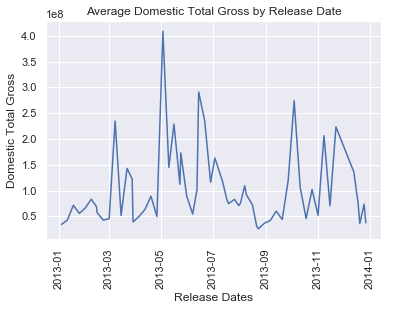

In [6]:
#Some dates have overlapping ReleaseDates, use mean per ReleaseDate for 
#average domestic total gross per date
movies_by_release = df.groupby('ReleaseDate').mean().reset_index()
#Plot and format
plt.plot(movies_by_release['ReleaseDate'],movies_by_release['DomesticTotalGross'])
plt.title('Average Domestic Total Gross by Release Date')
plt.xlabel('Release Dates')
plt.ylabel('Domestic Total Gross')
plt.xticks(rotation='vertical');

**Challenge 2**

Plot runtime vs. domestic total gross.

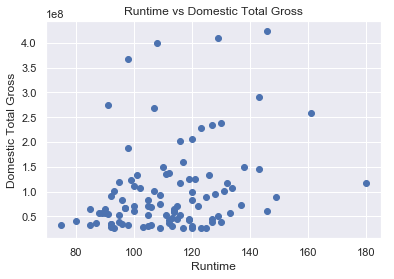

In [7]:
plt.scatter(df['Runtime'],df['DomesticTotalGross'])
plt.xlabel('Runtime')
plt.ylabel('Domestic Total Gross')
plt.title('Runtime vs Domestic Total Gross');

**Challenge 3**

Group your data by Rating and find the average runtime and domestic total gross at each level of Rating.

In [8]:
by_rating = df.groupby('Rating')['Runtime','DomesticTotalGross'].mean()
by_rating

,Runtime,DomesticTotalGross
Rating,,
G,107,268492764
PG,100,131135716
PG-13,118,111449769
R,111,69892429


**Challenge 4**

Make one figure with (N=the number of MPAA ratings there are) subplots, and in each plot the release date vs the domestic total gross.

In [9]:
#Group in easy to plot format
g_rating = df[df['Rating']=='G']
pg_rating = df[df['Rating']=='PG']
pg13_rating = df[df['Rating']=='PG-13']
r_rating = df[df['Rating']=='R']

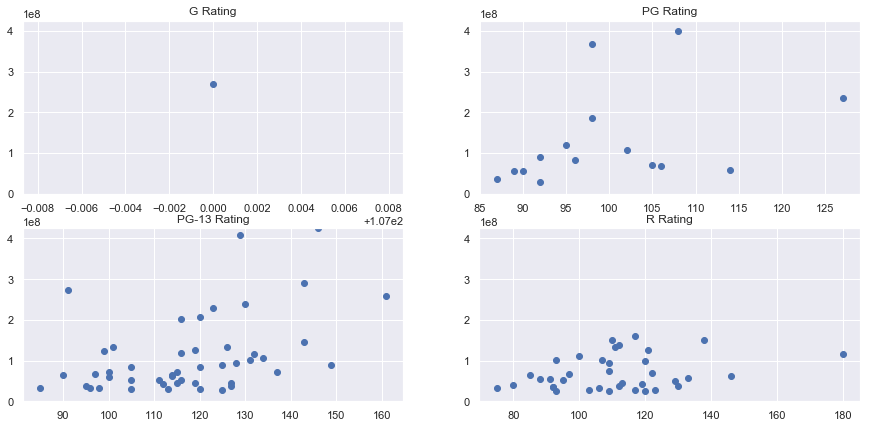

In [10]:
plt.figure(figsize=(15,7))
plt.subplot(2,2,1)
plt.ylim(0,df['DomesticTotalGross'].max())
plt.title('G Rating')
plt.scatter(g_rating['Runtime'],g_rating['DomesticTotalGross'])
plt.subplot(2,2,2)
plt.ylim(0,df['DomesticTotalGross'].max())
plt.title('PG Rating')
plt.scatter(pg_rating['Runtime'],pg_rating['DomesticTotalGross'])
plt.subplot(2,2,3)
plt.ylim(0,df['DomesticTotalGross'].max())
plt.title('PG-13 Rating')
plt.scatter(pg13_rating['Runtime'],pg13_rating['DomesticTotalGross'])
plt.subplot(2,2,4)
plt.ylim(0,df['DomesticTotalGross'].max())
plt.title('R Rating')
plt.scatter(r_rating['Runtime'],r_rating['DomesticTotalGross']);

**Challenge 5**

What director in your dataset has the highest gross per movie?

In [11]:
import re
p = re.compile('[a-z][A-Z]')

In [12]:
#Check the director column
df.Director.unique()

array(['Francis Lawrence', 'Shane Black', 'Chris BuckJennifer Lee',
       'Pierre CoffinChris Renaud', 'Zack Snyder', 'Alfonso Cuaron',
       'Dan Scanlon', 'Peter Jackson', 'Justin Lin', 'Sam Raimi',
       'J.J. Abrams', 'Alan Taylor', 'Marc Forster',
       'Kirk De MiccoChris Sanders', 'Paul Feig',
       'Rawson Marshall Thurber', 'David O. Russell', 'Baz Luhrmann',
       'James Wan', 'Seth Gordon', 'Dennis Dugan', 'James Mangold',
       'Adam McKay', 'Peter Berg', 'Jon Chu', nan, 'Louis Leterrier',
       'Martin Scorsese', 'Lee Daniels', 'Todd Phillips', 'Chris Wedge',
       'Paul Greengrass', 'Jeff Tremaine', 'Guillermo del Toro',
       'Evan GoldbergSeth Rogen', 'Antoine Fuqua', 'Brian Helgeland',
       'Neill Blomkamp', 'Klay Hall', 'Gore Verbinski', 'Joseph Kosinski',
       'John Lee Hancock', 'David Soren', 'Baltasar Kormakur',
       'Roland Emmerich', 'Andres Muschietti', 'Lasse Hallstrom',
       'Raja Gosnell', 'Malcolm D. Lee', 'Thor Freudenthal', 'John Moore',

In [13]:
#Create a function to return a list of both directors
def split_directors(string):
    try:
        location = p.search(string).span()
        if (string[location[0]-1:location[1]]=='DeM'
            or string[location[0]-1:location[1]]=='McK'
            or string[location[0]-1:location[1]]=='McQ'):
            return [string, ' ']
        else:
            first_director = string[:location[0]+1]
            second_director = string[location[0]+1:]
            return [first_director, second_director]
    except:
        return [string, ' ']

In [14]:
df['Directors_list'] = df['Director'].apply(split_directors)

In [15]:
df.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Directors_list
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22,"[Francis Lawrence, ]"
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03,"[Shane Black, ]"
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,"[Chris Buck, Jennifer Lee]"


In [16]:
#Create two new columns, one for each director
df[['Director1','Director2']] = pd.DataFrame((df['Directors_list']
                                              .values.tolist()))

In [17]:
df.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Directors_list,Director1,Director2
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22,"[Francis Lawrence, ]",Francis Lawrence,
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03,"[Shane Black, ]",Shane Black,
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,"[Chris Buck, Jennifer Lee]",Chris Buck,Jennifer Lee


In [18]:
#Check the films with a second director
df[df['Director2']!=' ']

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Directors_list,Director1,Director2
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,"[Chris Buck, Jennifer Lee]",Chris Buck,Jennifer Lee
3,Despicable Me 2,76000000,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03,"[Pierre Coffin, Chris Renaud]",Pierre Coffin,Chris Renaud
13,The Croods,135000000,187168425,Kirk De MiccoChris Sanders,PG,98,2013-03-22,"[Kirk De Micco, Chris Sanders]",Kirk De Micco,Chris Sanders
34,This is the End,32000000,101470202,Evan GoldbergSeth Rogen,R,107,2013-06-12,"[Evan Goldberg, Seth Rogen]",Evan Goldberg,Seth Rogen
81,Walking with Dinosaurs,80000000,36076121,Barry CookNeil Nightingale,PG,87,2013-12-20,"[Barry Cook, Neil Nightingale]",Barry Cook,Neil Nightingale
98,21 and Over,13000000,25682380,Jon LucasScott Moore,R,93,2013-03-01,"[Jon Lucas, Scott Moore]",Jon Lucas,Scott Moore


In [19]:
#See if any of the second directors are a first director in any film
df[(df['Director1']=='Chris Renaud')
   | (df['Director1']=='Chris Sanders')
   | (df['Director1']=='Jennifer Lee')
   | (df['Director1']=='Neil Nightingale')
   | (df['Director1']=='Scott Moore')
   | ((df['Director1']=='Seth Rogen'))]

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Directors_list,Director1,Director2


In [20]:
#No director overlap, Compare mean values for Dir1 and 2
(df.groupby('Director1')['DomesticTotalGross']
 .mean()
 .sort_values(ascending=False)
 .head(2))

Director1
Francis Lawrence    424668047
Shane Black         409013994
Name: DomesticTotalGross, dtype: int64

In [21]:
(df.groupby('Director2')['DomesticTotalGross']
 .mean()
 .sort_values(ascending=False)
 .head(2))

Director2
Jennifer Lee   400738009
Chris Renaud   368061265
Name: DomesticTotalGross, dtype: float64

Francis Lawrence has the highest gross per movie in the given dataset with $424,668,047.

**Challenge 6**

Bin your dataset into months and make a bar graph of the mean domestic total gross by month.  Error bars will represent the standard error of the mean.

Title of graph should include:  Mean Domestic Total Gross by Month in 2013

Topic for consideration:  what is the correct formula for the standard error of the mean?  Examine the error bars and see if they are "reasonable."


In [22]:
#Create a new ReleaseMonth column
df['ReleaseMonth'] = df['ReleaseDate'].apply(lambda x: x.month)

In [23]:
df.head(3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate,Directors_list,Director1,Director2,ReleaseMonth
0,The Hunger Games: Catching Fire,130000000,424668047,Francis Lawrence,PG-13,146,2013-11-22,"[Francis Lawrence, ]",Francis Lawrence,,11
1,Iron Man 3,200000000,409013994,Shane Black,PG-13,129,2013-05-03,"[Shane Black, ]",Shane Black,,5
2,Frozen,150000000,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22,"[Chris Buck, Jennifer Lee]",Chris Buck,Jennifer Lee,11


In [24]:
by_month = df.groupby('ReleaseMonth')['DomesticTotalGross'].mean().reset_index()

In [25]:
months = ['January', 'February','March','April',
          'May','June','July','August',
          'September','October','November','December']

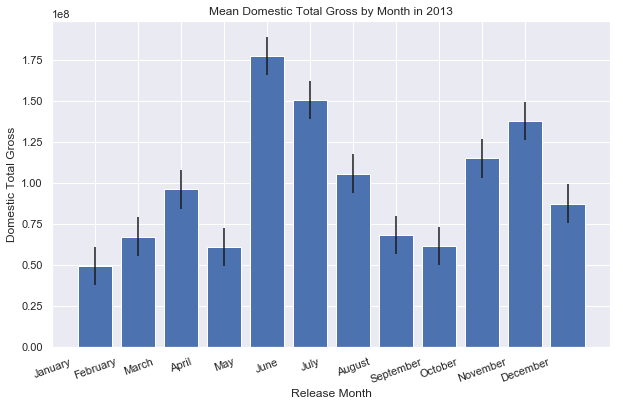

In [26]:
plt.figure(figsize=(10,6))
plt.bar(by_month.ReleaseMonth,
        by_month.DomesticTotalGross,
        yerr=by_month.DomesticTotalGross.sem())
plt.title('Mean Domestic Total Gross by Month in 2013')
plt.xlabel('Release Month')
plt.xticks(np.arange(12), months, rotation=20)
plt.ylabel('Domestic Total Gross');